### Problem 
Perusahaan asuransi kesehatan yang menyediakan asuransi kesehatan untuk customernya ingin memperluas layanan dengan menyediakan juga asuransi kendaraan untuk customer mereka. Perusahaan ingin melihat kecenderungan customer yang telah telah diberikan asuransi kesehatan untuk tertarik pada layanan asuransi kendaraan

### Goal
Membangun model untuk memprediksi kemungkinan customer akan tertarik dengan asuransi kendaraan atau tidak. Hal ini dapat membantu perusahaan untuk dapat menyusun strategi komunikasi dengan customer yang kemungkinan tertarik

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


- Deksripsi Kolom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


- Terdapat 381109 Baris dan 12 Kolom
- Tipe data sudah sesuai

In [5]:
df.set_index('id', inplace = True)
df.index.name = None

In [6]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
df['Response'].unique()

array([1, 0])

- Tidak terdapat Response selain Yes dan No seperti **unknown**

In [8]:
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

- Tidak terdapat missing value

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


- Customer berada pada rentang umur 20 - 85 tahun
- Terdapat customer yang memiliki lisensi mengemudi dan ada yang tidak
- Pembayaran premi untuk asuransi kesehatan berada pada rentang 2630 - 540165
- Lama customer menggunakan layanan asuransi pada perusahaan berada pada rentang 10 hari - 299 hari
- Jawaban customer terkait ketertarikan mengikuti asuransi kendaraan (Response) adalah Tertarik (1) dan tidak tertarik (0)

In [10]:
df.describe(include = "O").T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


- Customer lebih didominasi oleh Male
- Kebanyakan customer telah memiliki kendaraan selama 1 - 2 tahun
- Kebanyakan customer pernah mengalami kerusakan pada kendaraan mereka

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


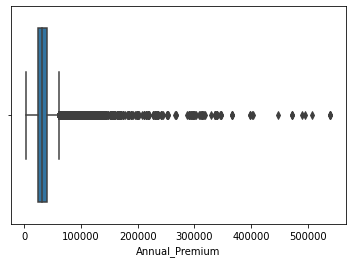

In [11]:
sns.boxplot(df['Annual_Premium'])
plt.show()

- Terdapat banyak outliers pada premi yang harus dibayar per tahun. Hal ini bisa terjadi karena setiap customer menggunakan asuransi dengan kategori/layanan berbeda

In [12]:
(pd.crosstab(index=df['Response'], columns='count', normalize=True)*100).round(2)

col_0,count
Response,
0,87.74
1,12.26


- Sebanyak ~88% merespon tidak tertarik (Data tidak balance)

In [13]:
pd.crosstab(index=df['Gender'], columns=df['Response'], normalize='index')*100

Response,0,1
Gender,,
Female,89.609759,10.390241
Male,86.158893,13.841107


- Customer Male yang merespon tertarik sebanyak ~14%
- Customer Female yang merespon tertarik sebanyak ~10%

In [14]:
df['Annual_Premium'].min()

2630.0

In [15]:
premi_bin = [0, 275000, df['Annual_Premium'].max()] 

In [16]:
labels = ['Rendah', 'Tinggi']

In [17]:
df['premi_bin'] = pd.cut(df['Annual_Premium'], bins=premi_bin, labels = labels)

In [18]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,premi_bin
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Rendah
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Rendah
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Rendah
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Rendah
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Rendah


In [19]:
pd.crosstab(index=df['premi_bin'], columns=df['Response'])

Response,0,1
premi_bin,,
Rendah,334344,46698
Tinggi,55,12


- Kebanyakan perusahaan memiliki customer dengan pembayaran premi rendah yaitu (2.630 - 275.000)
- Customer dengan premi kategori rendah yaitu (2.630 - 275.000) lebih banyak merespon tertarik dengan asuransi kendaraan yang ditawarkan

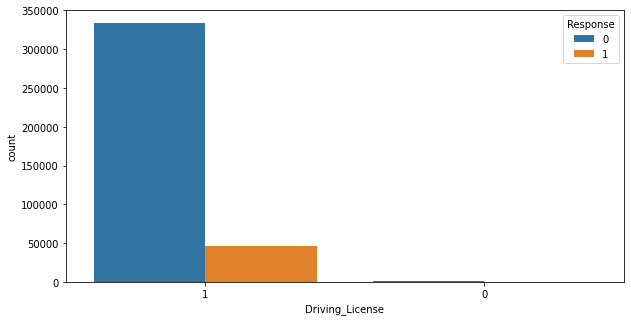

In [20]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x = df['Driving_License'], hue = df['Response'], order = df['Driving_License'].value_counts().index)
plt.show(fig)

- Customer yang telah memiliki driving license cenderung tertarik untuk layanan asuransi kendaraan

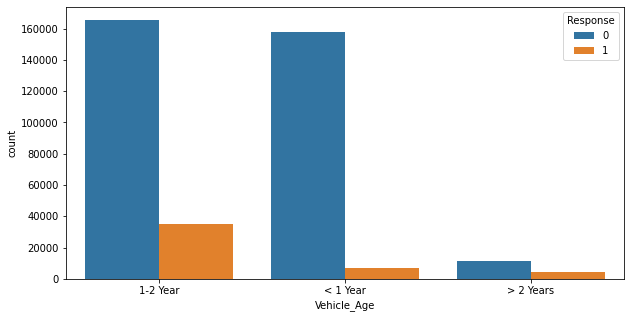

In [21]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x = df['Vehicle_Age'], hue = df['Response'], order = df['Vehicle_Age'].value_counts().index)
plt.show(fig)

- Customer yang memiliki umur kendaraan 1 - 2 tahun cenderung tertarik dengan layanan asuransi kendaraan

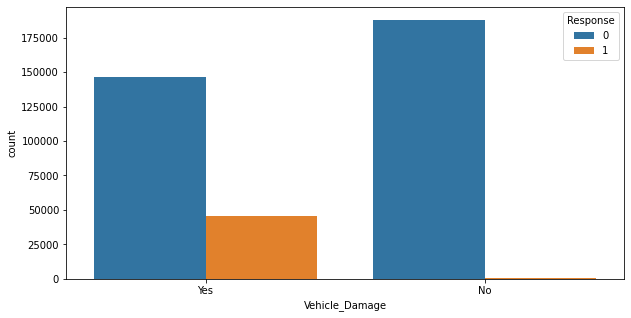

In [22]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x = df['Vehicle_Damage'], hue = df['Response'], order = df['Vehicle_Damage'].value_counts().index)
plt.show(fig)

- Customer yang sebelumnya pernah mengalami kerusakan pada kendaraan cenderung akan menerima layanan asuransi kendaraan

In [23]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,premi_bin
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Rendah
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Rendah
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Rendah
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Rendah
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Rendah


In [24]:
df['Gender_encode'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [25]:
df['Vehicle_Age_encode'] = df['Vehicle_Age'].map({'< 1 Year' : 0, '1-2 Year' : 1, '> 2 Years' : 2})

In [26]:
df['Vehicle_Damage_encode'] = df['Vehicle_Damage'].map({'No' : 0, 'Yes' : 1})

In [27]:
df['gender_license'] = df['Gender_encode'] + df['Driving_License']

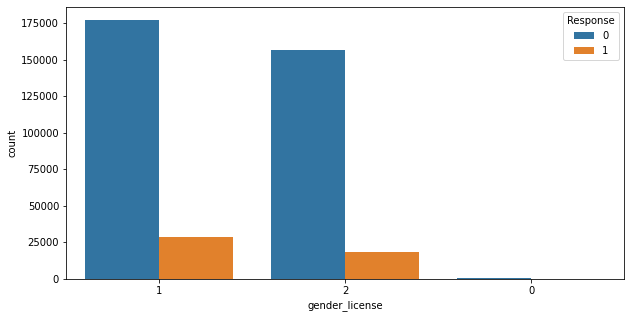

In [29]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x = df['gender_license'], hue = df['Response'], order = df['gender_license'].value_counts().index)
plt.show(fig)

- Male yang memiliki driving license lebih cenderung tertarik dengan layanan asuransi kendaraan

In [ ]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,premi_bin,Gender_encode,Vehicle_Age_encode,Vehicle_Damage_encode,gender_license
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Rendah,0,2,1,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Rendah,0,1,0,1
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Rendah,0,2,1,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Rendah,0,0,0,1
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Rendah,1,0,0,2


In [ ]:
df.drop(columns = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'premi_bin'], axis = 1, inplace = True)

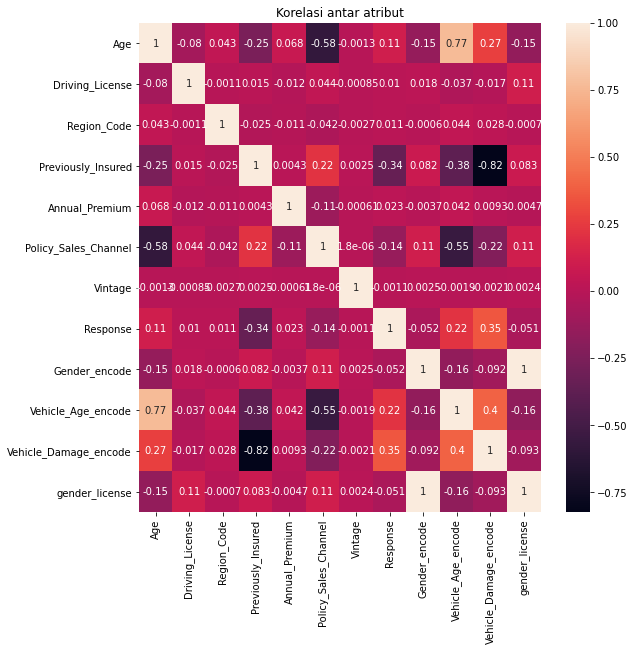

In [ ]:
plt.figure(figsize = (9,9))
sns.heatmap(df.corr(), annot = True)
plt.title("Korelasi antar atribut")
plt.show()

- Fitur yang akan digunakan untuk modelling nantinya dipilih berdasarkan korelasi

## Modelling

In [ ]:
x = df.drop(columns = ['Region_Code', 'Policy_Sales_Channel', 'Vintage', 'Response', 'gender_license'])
y = df['Response']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, train_size=.8, random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
## Base Model SVC

In [ ]:
model_svc = SVC()

In [ ]:
model_svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_sv_base = model_svc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score

In [ ]:
cm_svm_base = confusion_matrix(y_test, y_sv_base, labels=[1, 0])

In [ ]:
cm_svm_base = pd.DataFrame(data=cm_svm_base, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
cm_svm_base

,Pred 1,Pred 0
Akt 1,0,9342
Akt 0,0,66880


In [ ]:
accuracy_score(y_test, y_sv_base)

0.8774369604576107

In [ ]:
recall_score(y_test, y_sv_base)

0.0

- Performa model base SVM ini kurang baik karena nilai recall = 0 menunjukkan bahwa model tidak berhasil memprediksi satupun dari data point yang positif (tertarik mengikuti asuransi kendaraan) dengan benar

## Model Optimization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
std = StandardScaler()
mm = MinMaxScaler()
rb = RobustScaler()

In [ ]:
x_train_std = std.fit_transform(x_train)
x_train_mm = mm.fit_transform(x_train)
x_train_rb = rb.fit_transform(x_train)

In [ ]:
model_svc = SVC(max_iter = 1000)

In [ ]:
model_svc.fit(x_train_std, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_svc.fit(x_train_mm, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_svc.fit(x_train_rb, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
x_test_std = std.fit_transform(x_test)
x_test_mm = mm.fit_transform(x_test)
x_test_rb = rb.fit_transform(x_test)

In [ ]:
y_std= model_svc.predict(x_test_std)

In [ ]:
y_mm= model_svc.predict(x_test_mm)

In [ ]:
y_rb= model_svc.predict(x_test_rb)

In [ ]:
cm_std = confusion_matrix(y_test, y_std, labels=[1, 0])
cm_mm = confusion_matrix(y_test, y_mm, labels=[1, 0])
cm_rb = confusion_matrix(y_test, y_rb, labels=[1, 0])

Kesalahan fatal jika :
- Pada aktualnya, customer tertarik dengan layanan asuransi kendaraan, namun model memprediksi tidak tertarik. Hal ini akan menyebabkan perusahaan kehilangan kesempatan untuk menghubungi customer yang bisa jadi tertarik dengan layanan tersebut
- Fokus akan ke False Negative yang sesedikit mungkin

In [ ]:
cm_std = pd.DataFrame(data=cm_std, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
cm_std

,Pred 1,Pred 0
Akt 1,1128,8214
Akt 0,26135,40745


In [ ]:
recall_score(y_test, y_std)

0.12074502247912652

In [ ]:
accuracy_score(y_test, y_std)

0.5493558290257406

In [ ]:
cm_mm = pd.DataFrame(data=cm_mm, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
cm_mm

,Pred 1,Pred 0
Akt 1,2448,6894
Akt 0,35302,31578


In [ ]:
recall_score(y_test, y_mm)

0.26204238921001927

In [ ]:
accuracy_score(y_test, y_mm)

0.44640654929023116

In [ ]:
cm_rb = pd.DataFrame(data=cm_rb, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
cm_rb

,Pred 1,Pred 0
Akt 1,5754,3588
Akt 0,41494,25386


In [ ]:
recall_score(y_test, y_rb)

0.6159280667951188

In [ ]:
accuracy_score(y_test, y_rb)

0.4085434651412978

- Berdasarkan evaluasi dari ke 3 jenis scaling, didapatkan bahwa robust scaler memiliki nilai false negative paling sedikit

### Hyperparameter tuning

In [ ]:
svm_tune = SVC(max_iter = 1000)

In [ ]:
param_svm = {
    "C" : [0.001, 0.01, 0.1, 10],
    "kernel" : ['rbf', 'linear'],
    "gamma" : [0.001, 0.01, 0.1, 1]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_svm_tuned = GridSearchCV(estimator=svm_tune, param_grid=param_svm, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

In [ ]:
model_svm_tuned.fit(x_train_rb, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 20.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=1000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [ ]:
model_svm_tuned.best_score_

0.9998126739456219

In [ ]:
svm_tuned = model_svm_tuned.best_estimator_

In [ ]:
y_svm_tune_rb = model_svm_tuned.predict(x_test_rb)

In [ ]:
cm_tune_rb = confusion_matrix(y_test, y_svm_tune_rb, labels=[1, 0])

In [ ]:
pd.DataFrame(data=cm_tune_rb, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])

,Pred 1,Pred 0
Akt 1,9339,3
Akt 0,66869,11


In [ ]:
recall_score(y_test, y_svm_tune_rb)

0.9996788696210661

In [ ]:
accuracy_score(y_test, y_svm_tune_rb)

0.12266799611660675

- Hyperparameter tuning tidak lebih baik dari feature engineering yang menggunakan scaling saja

## Handling Imbalance Data

#### Random over sampling

In [ ]:
df_train = pd.concat([x_train, y_train], axis=1)

In [ ]:
not_interested = df_train[df_train['Response'] == 0]
interested = df_train[df_train['Response'] == 1]

In [ ]:
from sklearn.utils import resample

In [ ]:
interested_oversample = resample(interested, replace=True, n_samples = len(not_interested), random_state = 42)

In [ ]:
df_OverSampled = pd.concat([not_interested, interested_oversample])

In [ ]:
df_OverSampled['Response'].value_counts()

1    267519
0    267519
Name: Response, dtype: int64

In [ ]:
x_train_os = df_OverSampled.drop(columns = 'Response')
y_train_os = df_OverSampled['Response']

In [ ]:
svm_imbalance = SVC(max_iter = 1000)

In [ ]:
svm_imbalance.fit(x_train_os, y_train_os)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predOS = svm_imbalance.predict(x_test)

In [ ]:
cm_OS = confusion_matrix(y_test, y_predOS, labels=[1 , 0])

In [ ]:
df_OS = pd.DataFrame(data=cm_OS, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

In [ ]:
pd.DataFrame(data=cm_OS, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,2440,6902
Akt 0,15327,51553


#### UnderSampling

In [ ]:
notinterested_undersample = resample(not_interested, replace=True, n_samples = len(interested), random_state = 42)

In [ ]:
df_underSampled = pd.concat([notinterested_undersample, interested])

In [ ]:
df_underSampled['Response'].value_counts()

1    37368
0    37368
Name: Response, dtype: int64

In [ ]:
x_train_us = df_underSampled.drop(columns = 'Response')
y_train_us = df_underSampled['Response']

In [ ]:
svm_imbalance = SVC(max_iter = 1000)

In [ ]:
svm_imbalance.fit(x_train_us, y_train_us)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predUS = svm_imbalance.predict(x_test)

In [ ]:
cm_US = confusion_matrix(y_test, y_predUS, labels=[1 , 0])

In [ ]:
df_US = pd.DataFrame(data=cm_US, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

In [ ]:
pd.DataFrame(data=cm_US, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,2001,7341
Akt 0,14143,52737


- Menggunakan random oversampling lebih memberikan nilai evaluasi yang lebih bagus daripada undersampling